In [2]:
import scipy.io as sio
import VF as vf

#Import sklearn lib
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Import keras lib
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Numpy-Pandas-Matplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

Using TensorFlow backend.


In [3]:
import_traces = sio.loadmat('traces.mat')
vehicle_traces = pd.DataFrame(import_traces['traces_data'], columns=['time', 'id', 'x', 'y', 'speed', 'C', 'C+1', 'C-1', 'C-2', 'C-3'])

vehicle_traces.head()

,time,id,x,y,speed,C,C+1,C-1,C-2,C-3
0,37081.0,1.0,13379.670000,13854.720000,0.00,174.0,174.0,-5.0,-6.0,-7.0
1,37082.0,1.0,13379.322115,13852.335241,2.41,174.0,174.0,-5.0,-6.0,-7.0
2,37083.0,1.0,13378.633564,13847.615199,4.77,174.0,174.0,-5.0,-6.0,-7.0
3,37084.0,1.0,13377.623111,13840.688512,7.00,174.0,174.0,-5.0,-6.0,-7.0
4,37085.0,1.0,13376.544813,13833.296749,7.47,174.0,174.0,-5.0,-6.0,-7.0


## Filtratura delle tracce

In [4]:
# Buttiamo le colonne non utilizzate
vehicle_traces = vehicle_traces.drop(['x'], axis=1)
vehicle_traces = vehicle_traces.drop(['y'], axis=1)
vehicle_traces = vehicle_traces.drop(['speed'], axis=1)
vehicle_traces = vehicle_traces.drop(['C+1'], axis=1)
vehicle_traces = vehicle_traces.drop(['C-1'], axis=1)
vehicle_traces = vehicle_traces.drop(['C-2'], axis=1)
vehicle_traces = vehicle_traces.drop(['C-3'], axis=1)

In [5]:
# Convertiamo i time-step, ID-veicoli, ID-BS in valori interi
vehicle_traces = vehicle_traces.astype({'time': 'int32'})
vehicle_traces = vehicle_traces.astype({'id': 'int32'})
vehicle_traces = vehicle_traces.astype({'C': 'int32'})

vehicle_traces.dtypes

time    int32
id      int32
C       int32
dtype: object

In [6]:
# Estrai tutti i time-step
times = vf.compute_uniq_times(vehicle_traces)

# Estrai tutti gli ID-BS e riordinali
BSID = vehicle_traces['C'].unique()
BSID.sort()

print(BSID)

[  1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57  58
  59  60  61  62  63  64  65  66  67  69  70  71  72  73  75  76  77  79
  80  81  82  83  85  86  87  88  89  91  92  93  94  95  96  97  98  99
 100 101 102 104 105 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 127 128 129 130 131 132 133 135 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 153 154 155 156 157 158 159 160 161
 162 163 165 167 168 169 170 171 172 173 174 175 176 177 179 180 181 182
 183 184 185 186 187 188 189 191 192 194 195 196 197 198 199 200 201 202
 203 205 206 208 209 210 213 214 215 216 217 219 220 221 222 224 225]


In [7]:
BS = 130

# Filtra solamente le tracce interenti al BS selezionato
BS_batch = vehicle_traces[vehicle_traces['C'] == BS]

# Ottieni una lista di tempi filtrato per ridurre il tempo di calcolo
BS_times = BS_batch['time'].unique()
BS_times.sort()
#BS_times = BS_times - BS_times[0]

nv = np.zeros(len(times))

#print(BS_times)

for time in BS_times:
    # Conta i connessi al tempo time
    tmp_batch = BS_batch[BS_batch['time'] == time]
    nv[time - BS_times[0]] = len(tmp_batch)


<IPython.core.display.Javascript object>


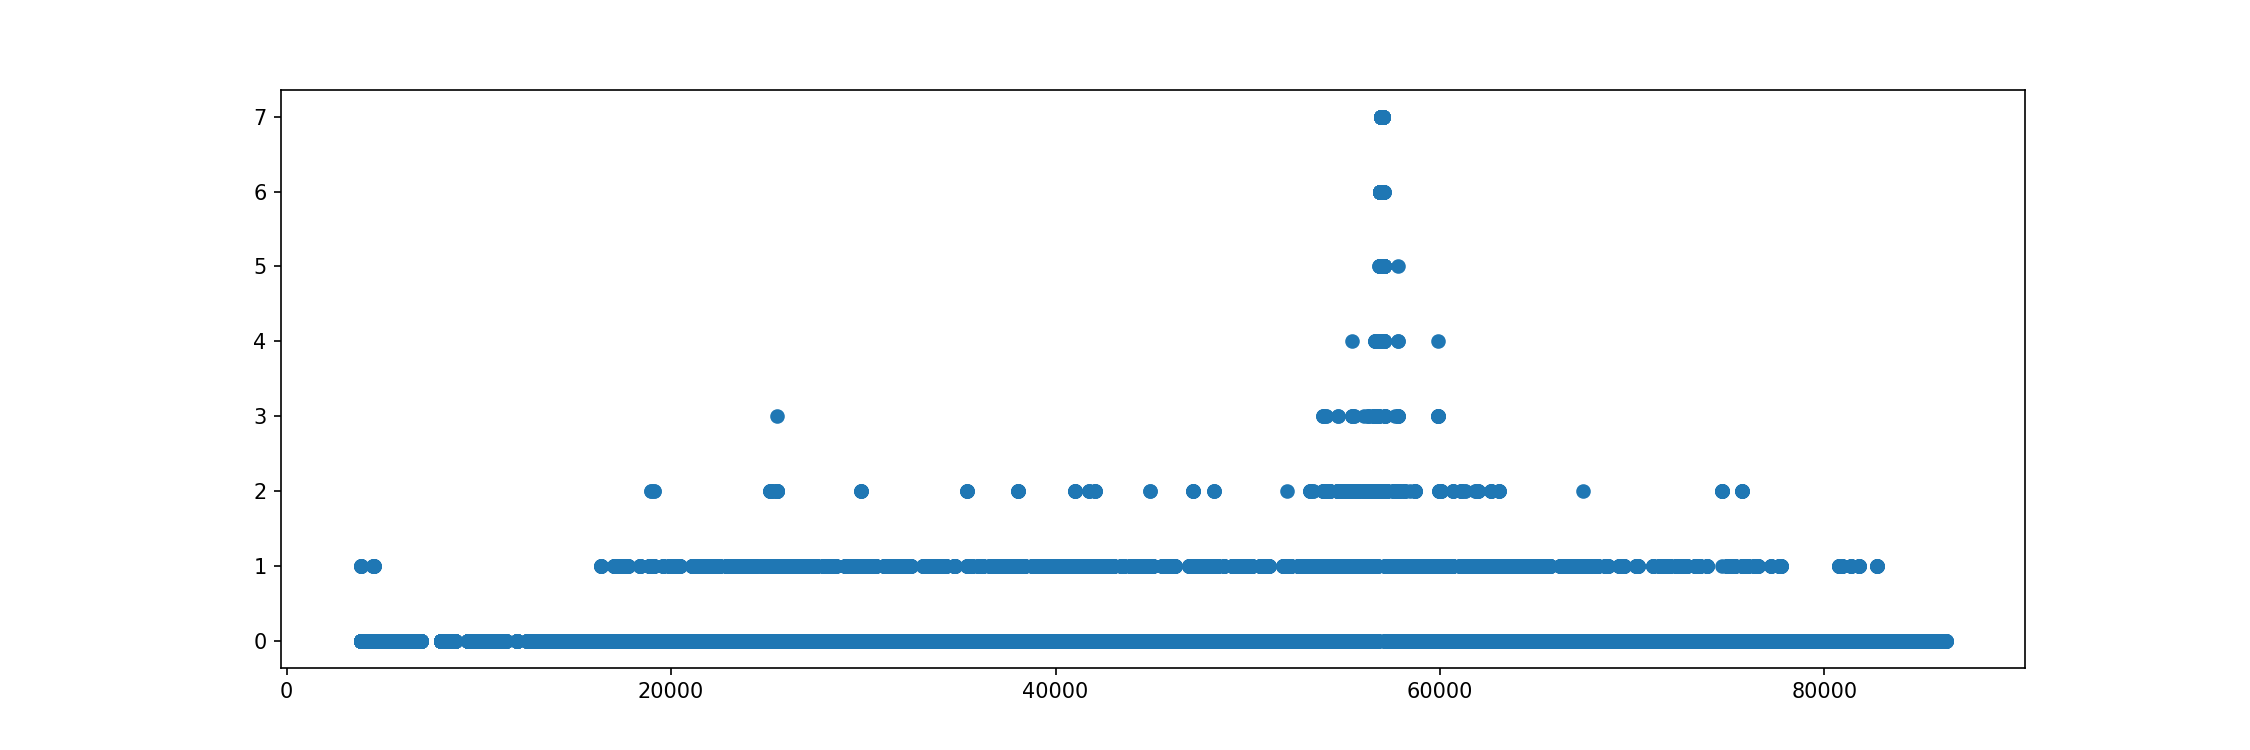

In [25]:
plt.figure(figsize=(15,5))
#plt.plot(times, nv, markersize=0.1, linewidth=0.1)
plt.scatter(times, nv)
plt.show()

## Scalamento dei Dati
    

In [21]:
# Rescaliamo i dati prima si creare la barra delle predizioni
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(nv)
scaled = scaler.transform(nv)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.